In [29]:
import cv2
from IPython.display import Image, display
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from preprocessing import *
%matplotlib inline

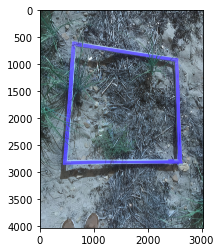

In [87]:
#Import and convert to hsv
img = cv2.imread('test2.jpg')
imshow(img)

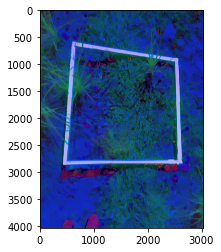

In [88]:
#Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imshow(hsv)

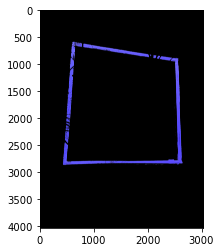

In [89]:
#Yellow color range mask
#lower_blue = np.array([46,46,0])
#upper_blue = np.array([170,255,255])
#mask = cv2.inRange(hsv, lower_blue, upper_blue)
mask = cv2.inRange(hsv, (0, 70, 50), (10, 160, 255))
mask2 = cv2.inRange(hsv, (170, 70, 50), (180, 255, 255))
result = cv2.bitwise_and(img, img, mask = mask2)
imshow(result)

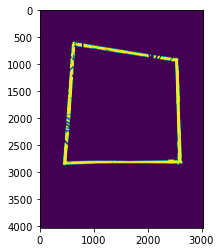

In [90]:
#Gray + Threshhold
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_OTSU)[1]
imshow(thresh)

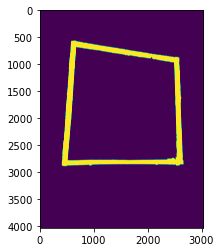

In [91]:
kernel = np.ones((7,7),np.uint8)
dialate = cv2.dilate(thresh, kernel, iterations=6)
imshow(dialate)

In [117]:
kernel = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])
sharpened = cv2.filter2D(cv2.filter2D(cv2.filter2D(dialate, -1, kernel), -1, kernel), -1, kernel)
print(sharpened)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


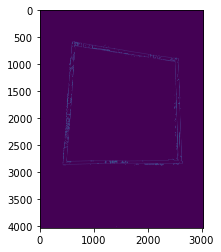

In [118]:
edges = cv2.Canny(gray,100,200)
imshow(edges)

[[[2505  899]]

 [[2568 2822]]

 [[ 539 2187]]

 [[ 638  582]]]


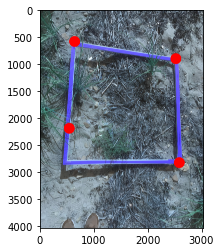

In [133]:
#good features to track
corners = cv2.goodFeaturesToTrack(edges, 4, 0.5, 1600)
#corners = cv.cornerHarris(gray,2,3,0.04)
corners = np.int0(corners)
print(corners)
circle_img = img.copy()
bb = []
for i in corners:
    x, y = i.ravel()
    bb.append((x, y))
    cv2.circle(circle_img, (x, y), 100, 255, -1)
imshow(circle_img)

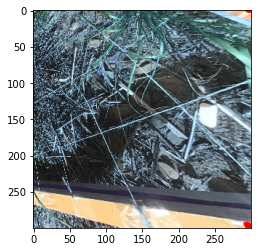

In [30]:
rows,cols,ch = img.shape
pts1 = np.float32(corners)
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.imshow(dst)

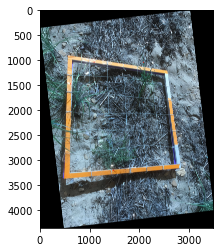

In [24]:
#Rotate until parallel
(heigth, width) = img.shape[:2]
(cx, cy) = (width // 2, heigth // 2)

bb_copy = bb.copy()
top_row = topRow(bb)

if top_row[0][1] > top_row[1][1]:
    c = -1
if top_row[0][1] < top_row[1][1]:
    c = 1

theta = 0
while round(top_row[0][1]) != round(top_row[1][1]):
    theta += 0.1*c
    bb_new = rotate_box(bb_copy, cx, cy, heigth, width, theta)
    top_row = topRow(bb_new)
rotated_img = rotate_bound(img, theta)
rotated_clean = rotate_bound(circle_img, theta)
imshow(rotated_img)

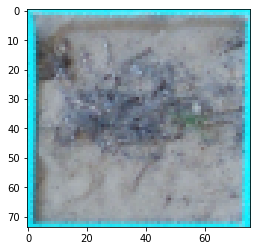

In [25]:
x1, x2, y1, y2 = Corners(bb_new)
crop = rotated_clean[y1:y2, x1:x2]
imshow(crop)